In [79]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data_1 = data.iloc[:,1:]
data_1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data_1.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data_1.shape

(150, 5)

In [14]:
data_2 = data_1.iloc[:,:-1]
data_2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_2)

MinMaxScaler()

In [30]:
data_3 = scaler.transform(data_2)
data_3.shape

(150, 4)

In [41]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=len(data_1['Species'].unique()),
       n_init = 10,
       tol=1e-4,
       verbose=1,
       max_iter=300       
      )


In [50]:
labels = kmean.fit_predict(data_3)
labels

Initialization complete
Iteration 0, inertia 11.382114957831043
Iteration 1, inertia 7.620775946294297
Iteration 2, inertia 7.217884802308982
Iteration 3, inertia 7.193121890494895
Iteration 4, inertia 7.182667132756727
Iteration 5, inertia 7.169111467307471
Iteration 6, inertia 7.151593675022101
Iteration 7, inertia 7.138647703985377
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 16.505715938995102
Iteration 1, inertia 7.241238900429281
Iteration 2, inertia 6.998114004826762
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 9.8235401460663
Iteration 1, inertia 7.153310861090505
Iteration 2, inertia 7.0378733437546455
Iteration 3, inertia 7.003317600098681
Iteration 4, inertia 6.998114004826762
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 11.83595598105766
Iteration 1, inertia 7.151413249167478
Iteration 2, inertia 7.020456577433702
Iteration 3, inertia 7.0

In [58]:
data[labels == 2]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
100,101,6.3,3.3,6.0,2.5,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
108,109,6.7,2.5,5.8,1.8,Iris-virginica


# Graphical Visualization of KMean Clustering

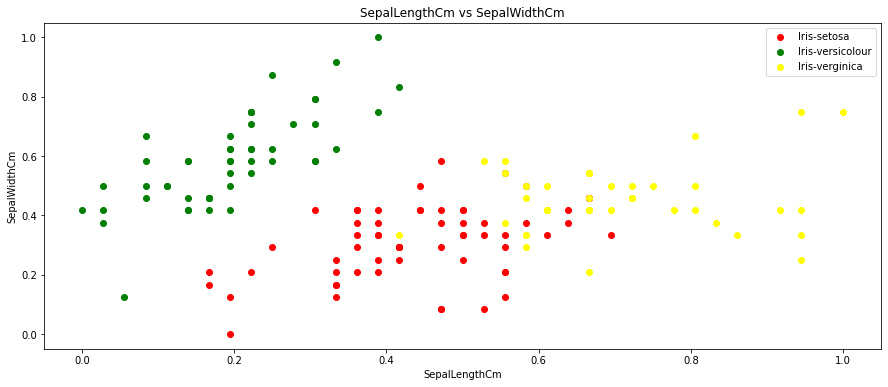

In [78]:
plt.figure(figsize=(15,6))
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")

plt.scatter(data_3[labels==0, 0],data_3[labels==0, 1], label= "Iris-setosa", c = 'red')
plt.scatter(data_3[labels==1, 0],data_3[labels==1, 1], label= "Iris-versicolour", c = 'green')
plt.scatter(data_3[labels==2, 0],data_3[labels==2, 1], label= "Iris-verginica", c = 'yellow')
plt.title("SepalLengthCm vs SepalWidthCm")
plt.legend(["Iris-setosa", "Iris-versicolour", "Iris-verginica"])